In [1]:
import pandas as pd
import seaborn as asn
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

# for visualizing locations on maps
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.io import shapereader
import geopandas
import shapely
import datetime

PROJ: proj_create_from_database: Cannot find proj.db


In [2]:
# Load the data
ts_path = "../opsd-time_series-2019-06-05/time_series_60min_singleindex.csv"
df = pd.read_csv(ts_path,parse_dates=['cet_cest_timestamp'])
df.shape
df.dtypes

utc_timestamp                                   object
cet_cest_timestamp                              object
AL_load_actual_entsoe_power_statistics         float64
AT_load_actual_entsoe_power_statistics         float64
AT_load_actual_entsoe_transparency             float64
                                                ...   
UA_east_load_actual_entsoe_transparency        float64
UA_east_load_forecast_entsoe_transparency      float64
UA_west_load_actual_entsoe_power_statistics    float64
UA_west_load_actual_entsoe_transparency        float64
UA_west_load_forecast_entsoe_transparency      float64
Length: 393, dtype: object

In [3]:
df.head()

,utc_timestamp,cet_cest_timestamp,AL_load_actual_entsoe_power_statistics,AT_load_actual_entsoe_power_statistics,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BA_load_actual_entsoe_power_statistics,...,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,TR_load_actual_entsoe_power_statistics,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency,UA_east_load_actual_entsoe_transparency,UA_east_load_forecast_entsoe_transparency,UA_west_load_actual_entsoe_power_statistics,UA_west_load_actual_entsoe_transparency,UA_west_load_forecast_entsoe_transparency
0,2004-12-31T23:00:00Z,2005-01-01 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-01-01T00:00:00Z,2005-01-01 01:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-01-01T01:00:00Z,2005-01-01 02:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-01-01T02:00:00Z,2005-01-01 03:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-01-01T03:00:00Z,2005-01-01 04:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,utc_timestamp,cet_cest_timestamp,AL_load_actual_entsoe_power_statistics,AT_load_actual_entsoe_power_statistics,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BA_load_actual_entsoe_power_statistics,...,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,TR_load_actual_entsoe_power_statistics,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency,UA_east_load_actual_entsoe_transparency,UA_east_load_forecast_entsoe_transparency,UA_west_load_actual_entsoe_power_statistics,UA_west_load_actual_entsoe_transparency,UA_west_load_forecast_entsoe_transparency
125588,2019-04-30T19:00:00Z,2019-04-30 21:00:00+02:00,NaN,NaN,7135.0,6895.0,NaN,NaN,1787.0,NaN,...,3250.0,0.3,NaN,15363.0,16287.0,14793.0,15800.0,NaN,570.0,487.0
125589,2019-04-30T20:00:00Z,2019-04-30 22:00:00+02:00,NaN,NaN,6838.0,6561.0,NaN,NaN,1917.0,NaN,...,3150.0,0.3,NaN,14549.0,14947.0,14041.0,14500.0,NaN,508.0,447.0
125590,2019-04-30T21:00:00Z,2019-04-30 23:00:00+02:00,NaN,NaN,6343.0,6050.0,NaN,NaN,2218.0,NaN,...,3070.0,0.3,NaN,13603.0,13710.0,13152.0,13300.0,NaN,451.0,410.0
125591,2019-04-30T22:00:00Z,2019-05-01 00:00:00+02:00,NaN,NaN,5401.0,5168.0,NaN,NaN,2496.0,NaN,...,2960.0,0.3,NaN,13240.0,13400.0,12895.0,13000.0,NaN,345.0,400.0
125592,2019-04-30T23:00:00Z,2019-05-01 01:00:00+02:00,NaN,NaN,5176.0,4941.0,NaN,NaN,2532.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
edf = pd.read_csv(ts_path)
edf = edf.sort_values(by='utc_timestamp')
edf = edf.loc[edf.utc_timestamp.str.startswith("2016")]
edf.index = edf.utc_timestamp

In [28]:
d = "2016-06-02"
edf_day = edf.loc[edf.index.str.startswith(d)]

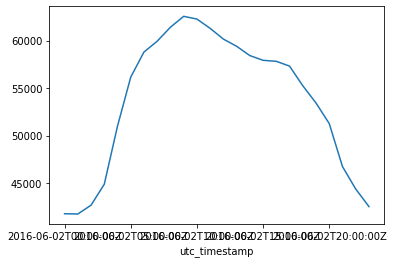

In [40]:
edf_day['DE_load_forecast_entsoe_transparency'].plot()
#edf_day['DE_50hertz_wind_generation_actual'].plot()
#edf_day['DE_solar_generation_actual'].plot()


In [38]:
for i,value in enumerate(edf['DE_load_forecast_entsoe_transparency']):
    if edf['DE_50hertz_wind_generation_actual'][i]+edf['DE_solar_generation_actual'][i]>value:
        print(i,value-(edf['DE_50hertz_wind_generation_actual'][i]+edf['DE_solar_generation_actual'][i]))

In [65]:
house_path = "../household_data_60min_singleindex.csv"
house = pd.read_csv(house_path)
house.head(10)

,utc_timestamp,cet_cest_timestamp,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge,DE_KN_industrial3_area_offices,...,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine,interpolated
0,2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-12-11T22:00:00Z,2014-12-11T23:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-12-11T23:00:00Z,2014-12-12T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DE_KN_residential3_washing_machine
7,2014-12-12T00:00:00Z,2014-12-12T01:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-12-12T01:00:00Z,2014-12-12T02:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014-12-12T02:00:00Z,2014-12-12T03:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
house = house.sort_values(by='utc_timestamp')
house = house.loc[house.utc_timestamp.str.startswith("2016")]
house.index = house.utc_timestamp
d = "2016-06-02"
house_day = house.loc[house.index.str.startswith(d)]



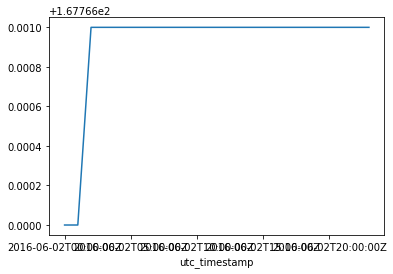

In [70]:
house_day['DE_KN_residential1_dishwasher'].plot()



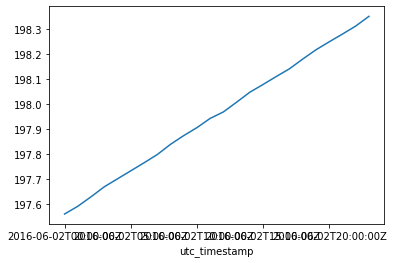

In [67]:
house_day['DE_KN_residential1_freezer'].plot()


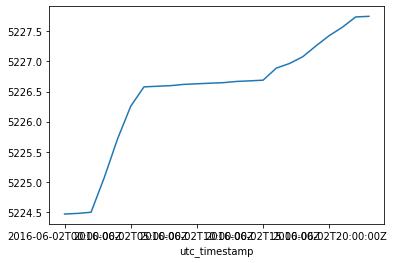

In [68]:
house_day['DE_KN_residential1_heat_pump'].plot()


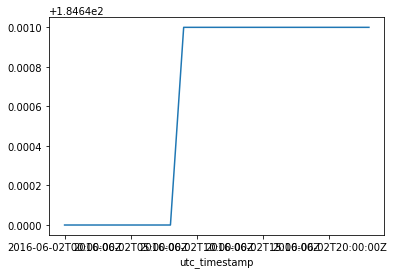

In [69]:
house_day['DE_KN_residential1_washing_machine'].plot()

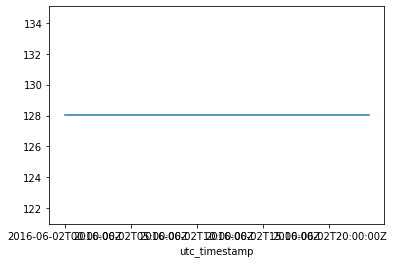

In [59]:
house_day['DE_KN_residential5_washing_machine'].plot()

In [73]:
weather_path = "../weather_data.csv"
wdf = pd.read_csv(weather_path)